In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.feature_selection import chi2

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning lab/Dataset/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.shape

(150, 6)

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Extract the column you want to store into a separate dataframe
df_species = df[['Species']]


In [ ]:
df_species

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
df = pd.get_dummies(df, columns=['Species'])

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
x = df.drop(['Id','Species_Iris-virginica'],axis=1)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0
146,6.3,2.5,5.0,1.9,0,0
147,6.5,3.0,5.2,2.0,0,0
148,6.2,3.4,5.4,2.3,0,0


In [ ]:
x.describe()

In [ ]:
df_new = pd.concat([x,df_species], axis=1)

In [ ]:
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species
0,5.1,3.5,1.4,0.2,1,0,Iris-setosa
1,4.9,3.0,1.4,0.2,1,0,Iris-setosa
2,4.7,3.2,1.3,0.2,1,0,Iris-setosa
3,4.6,3.1,1.5,0.2,1,0,Iris-setosa
4,5.0,3.6,1.4,0.2,1,0,Iris-setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,Iris-virginica
146,6.3,2.5,5.0,1.9,0,0,Iris-virginica
147,6.5,3.0,5.2,2.0,0,0,Iris-virginica
148,6.2,3.4,5.4,2.3,0,0,Iris-virginica


**Pearson Correlation**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from scipy.stats import chisquare,chi2_contingency, power_divergence
from scipy import stats

[]

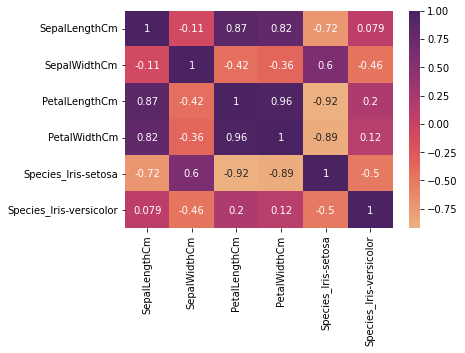

In [ ]:
sns.heatmap(df_new.corr(), annot=True, cmap='flare')
plt.plot()

In [ ]:
import pandas as pd
contingency_table = pd.crosstab(x['SepalLengthCm'], x['SepalWidthCm'],margins = True)


In [ ]:
stats.chi2_contingency(contingency_table)

(791.7225565439851,
 0.6240373950259228,
 805,
 array([[6.66666667e-03, 2.00000000e-02, 2.66666667e-02, 2.00000000e-02,
         5.33333333e-02, 3.33333333e-02, 6.00000000e-02, 9.33333333e-02,
         6.66666667e-02, 1.73333333e-01, 8.00000000e-02, 8.66666667e-02,
         4.00000000e-02, 8.00000000e-02, 4.00000000e-02, 2.00000000e-02,
         2.00000000e-02, 4.00000000e-02, 1.33333333e-02, 6.66666667e-03,
         6.66666667e-03, 6.66666667e-03, 6.66666667e-03, 1.00000000e+00],
        [2.00000000e-02, 6.00000000e-02, 8.00000000e-02, 6.00000000e-02,
         1.60000000e-01, 1.00000000e-01, 1.80000000e-01, 2.80000000e-01,
         2.00000000e-01, 5.20000000e-01, 2.40000000e-01, 2.60000000e-01,
         1.20000000e-01, 2.40000000e-01, 1.20000000e-01, 6.00000000e-02,
         6.00000000e-02, 1.20000000e-01, 4.00000000e-02, 2.00000000e-02,
         2.00000000e-02, 2.00000000e-02, 2.00000000e-02, 3.00000000e+00],
        [6.66666667e-03, 2.00000000e-02, 2.66666667e-02, 2.00000000e-02,
  

**Chi Square between class and attribute**

In [ ]:
table = pd.crosstab(df_species['Species'],x['PetalLengthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 271.79999999999995 p-value 1.1775672327529825e-21


In [ ]:
table = pd.crosstab(df_species['Species'],x['PetalWidthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 271.75 p-value 2.1648103108815957e-35


In [ ]:
table = pd.crosstab(df_species['Species'],x['SepalLengthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 156.26666666666668 p-value 6.665987344005466e-09


In [ ]:
table = pd.crosstab(df_species['Species'],x['SepalWidthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 88.36446886446886 p-value 8.303947787862062e-05


In [ ]:
table = pd.crosstab(df_species['Species'],x['Species_Iris-setosa']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 149.99999999999997 p-value 2.6786369618081254e-33


In [ ]:
table = pd.crosstab(df_species['Species'],x['Species_Iris-versicolor']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 149.99999999999997 p-value 2.6786369618081254e-33


**Chi Square between Attribute to Attribute**

In [ ]:
table = pd.crosstab(x['SepalLengthCm'],x['SepalWidthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 791.7225565439851 p-value 0.1300253817065682


In [ ]:
table = pd.crosstab(x['SepalLengthCm'],x['PetalLengthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 1922.9347363945576 p-value 2.6830523867648017e-17


In [ ]:
table = pd.crosstab(x['SepalLengthCm'],x['PetalWidthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 794.2022610326181 p-value 0.019450852589702666


In [ ]:
table = pd.crosstab(x['SepalLengthCm'],x['Species_Iris-setosa']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 108.63928571428572 p-value 9.887948160473998e-10


In [ ]:
table = pd.crosstab(x['SepalLengthCm'],x['Species_Iris-versicolor']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 48.253571428571426 p-value 0.05354838241778697


In [ ]:
table = pd.crosstab(x['SepalWidthCm'],x['PetalLengthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 1009.0093482905983 p-value 0.026476408996136024


In [ ]:
table = pd.crosstab(x['SepalWidthCm'],x['PetalWidthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 588.5673370432986 p-value 5.7588555702761433e-05


In [ ]:
table = pd.crosstab(x['SepalWidthCm'],x['Species_Iris-setosa']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 69.70961538461538 p-value 7.347661106563978e-07


In [ ]:
table = pd.crosstab(x['SepalWidthCm'],x['Species_Iris-versicolor']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 41.03873626373627 p-value 0.008154044612076162


In [ ]:
table = pd.crosstab(x['PetalLengthCm'],x['PetalWidthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')


Chi-square 1150.4665260334903 p-value 2.394536654111862e-09


In [ ]:
table = pd.crosstab(x['PetalLengthCm'],x['Species_Iris-setosa']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')


Chi-square 150.0 p-value 4.731311946083758e-14


In [ ]:
table = pd.crosstab(x['PetalLengthCm'],x['Species_Iris-versicolor']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')


Chi-square 128.85 p-value 9.393893329581147e-11


In [ ]:
table = pd.crosstab(x['PetalWidthCm'],x['Species_Iris-setosa']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')


Chi-square 150.0 p-value 1.7561046369273012e-21


In [ ]:
table = pd.crosstab(x['PetalWidthCm'],x['Species_Iris-versicolor']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')


Chi-square 128.8125 p-value 1.6873101472518103e-17


In [ ]:
df2 = df.drop(['Id'],axis=1)
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


**Coefficient**

In [ ]:
import numpy as np

In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
 model = LinearRegression().fit(x, y)

In [ ]:
 r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 1.0


In [ ]:
print(f"intercept: {model.intercept_}")

intercept: -3.3306690738754696e-16


In [ ]:
print(f"coefficients: {model.coef_}")

coefficients: [-1.04090938e-16  3.33066907e-16  2.77555756e-17 -1.11022302e-16
  1.00000000e+00  3.29597460e-17]
